In [1]:
import random
from math import ceil
from decimal import Decimal

 
FIELD_SIZE = 10000
 
 
def reconstruct_secret(shares):
    """
    Combines individual shares (points on graph)
    using Lagranges interpolation.
 
    `shares` is a list of points (x, y) belonging to a
    polynomial with a constant of our key.
    """
    sums = 0
    prod_arr = []
 
    for j, share_j in enumerate(shares):
        xj, yj = share_j
        prod = Decimal(1)
 
        for i, share_i in enumerate(shares):
            xi, _ = share_i
            if i != j:
                prod *= Decimal(Decimal(xi)/(xi-xj))
 
        prod *= yj
        sums += Decimal(prod)
 
    return int(round(Decimal(sums), 0))
 
 
def polynom(x, coefficients):
    """
    This generates a single point on the graph of given polynomial
    in `x`. The polynomial is given by the list of `coefficients`.
    """
    point = 0
    # Loop through reversed list, so that indices from enumerate match the
    # actual coefficient indices
    for coefficient_index, coefficient_value in enumerate(coefficients[::-1]):
        point += x ** coefficient_index * coefficient_value
    return point
 
 
def coeff(t, secret):
    """
    Randomly generate a list of coefficients for a polynomial with
    degree of `t` - 1, whose constant is `secret`.
 
    For example with a 3rd degree coefficient like this:
        3x^3 + 4x^2 + 18x + 554
 
        554 is the secret, and the polynomial degree + 1 is
        how many points are needed to recover this secret.
        (in this case it's 4 points).
    """
    coeff = [random.randrange(0, FIELD_SIZE) for _ in range(t - 1)]
    coeff.append(secret)
    return coeff
 
 
def generate_shares(n, m, secret):
    """
    Split given `secret` into `n` shares with minimum threshold
    of `m` shares to recover this `secret`, using SSS algorithm.
    """
    coefficients = coeff(m, secret)
    shares = []
 
    for i in range(1, n+1):
        x = random.randrange(1, FIELD_SIZE)
        shares.append((x, polynom(x, coefficients)))
 
    return shares
 
 
# Driver code
if __name__ == '__main__':
 
    # (3,5) sharing scheme
    t, n = 3, 6
    secret = 4321
    print(f'Original Secret: {secret}')
    
 
    # Phase I: Generation of shares
    shares = generate_shares(n, t, secret)
    xList, yList = zip(*shares)
    print('x-coordinates: '+", ".join(map(str, xList)))
    print('y-coordinates: '+", ".join(map(str, yList)))
            
            
 
    # Phase II: Secret Reconstruction
    # Picking t shares randomly for
    # reconstruction
    pool = random.sample(shares, t)
    print(f'Combining shares: {", ".join(str(share) for share in pool)}')
    print(f'Reconstructed secret: {reconstruct_secret(pool)}')

Original Secret: 4321
x-coordinates: 9798, 4807, 4044, 3439, 2836, 8409
y-coordinates: 936853626277, 225518698029, 159613813081, 115432446621, 78505095657, 690067434961
Combining shares: (2836, 78505095657), (4807, 225518698029), (3439, 115432446621)
Reconstructed secret: 4321


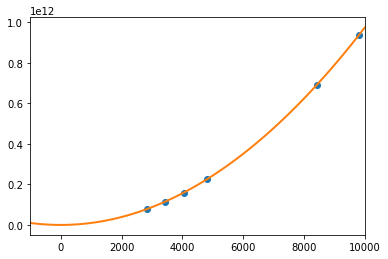

x-coordinates: 9798, 4807, 4044, 3439, 2836, 8409
y-coordinates: 936853626277, 225518698029, 159613813081, 115432446621, 78505095657, 690067434961


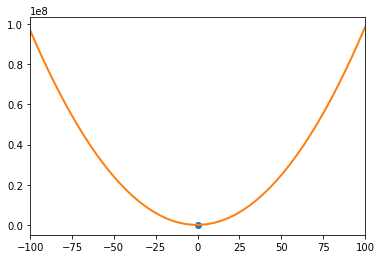

Secret: 0, 4321.0007300502


In [2]:
##Plot Polynom
from matplotlib import pyplot as plt
import numpy as np

#Separate x and y values
x = []
y = []
for i in range(len(shares)):
    x.append(shares[i][0])
    y.append(shares[i][1])

coefficients = np.polyfit(x, y, 4)
poly = np.poly1d(coefficients)

#Calculate new x and y values
new_x = np.linspace(-1000, 10000)
new_y = poly(new_x)

secret_x = 0
secret_y = poly(secret_x)

#Plot polynomial fit
plt.plot(x, y, "o", new_x, new_y, linewidth=2)
plt.xlim([-1000, 10000 ])
plt.show()

print('x-coordinates: '+", ".join(map(str, x)))
print('y-coordinates: '+", ".join(map(str, y)))

new2_x = np.linspace(-100, +100)
new2_y = poly(new2_x)


#Plot polynomial fit
plt.plot(secret_x, secret_y, "o", new2_x, new2_y, linewidth=2)
plt.xlim([-100, +100])
plt.show()

print('Secret: ' + str(secret_x) + ', ' + str(secret_y))
